In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
road_users = ['CarDriver', 'CarPngr', 'Mtrcyclist', 'PdlCyclist', 'Pedestrian']
counter_parties = ['Cntrprt23WldMV', 'CntrprtCrTrkVn', 'CntrprtFxdStnry', 'CntrprtHvyVhcl', 'CntrprtNClsn', 'CntrprtOther', 'CntrprtNMV', 'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn']

for user in road_users:
    for counter_party in counter_parties:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['Severity'].sum()
        print(f"Sum of Severity for {user} and {counter_party}: {result}")

Sum of Severity for CarDriver and Cntrprt23WldMV: 765
Sum of Severity for CarDriver and CntrprtCrTrkVn: 218589
Sum of Severity for CarDriver and CntrprtFxdStnry: 96354
Sum of Severity for CarDriver and CntrprtHvyVhcl: 17628
Sum of Severity for CarDriver and CntrprtNClsn: 51486
Sum of Severity for CarDriver and CntrprtOther: 4752
Sum of Severity for CarDriver and CntrprtNMV: 654
Sum of Severity for CarDriver and CntrprtPdlC: 162
Sum of Severity for CarDriver and CntrprtPdstAnml: 2778
Sum of Severity for CarDriver and CntrprtTrn: 339
Sum of Severity for CarPngr and Cntrprt23WldMV: 222
Sum of Severity for CarPngr and CntrprtCrTrkVn: 79881
Sum of Severity for CarPngr and CntrprtFxdStnry: 31581
Sum of Severity for CarPngr and CntrprtHvyVhcl: 5703
Sum of Severity for CarPngr and CntrprtNClsn: 26655
Sum of Severity for CarPngr and CntrprtOther: 2355
Sum of Severity for CarPngr and CntrprtNMV: 207
Sum of Severity for CarPngr and CntrprtPdlC: 33
Sum of Severity for CarPngr and CntrprtPdstAnml: 

In [12]:
index = ["2- or 3- wheeled motor vehicle", "Car, pick-up truck or van", "Fixed or stationary object", "Heavy transport vehicle or bus", 
         "Non-collision transport accident",  "Other and unspecified transport accidents", "Other non-motor vehicle", 
         "Pedal cycle", "Pedestrian or animal"]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

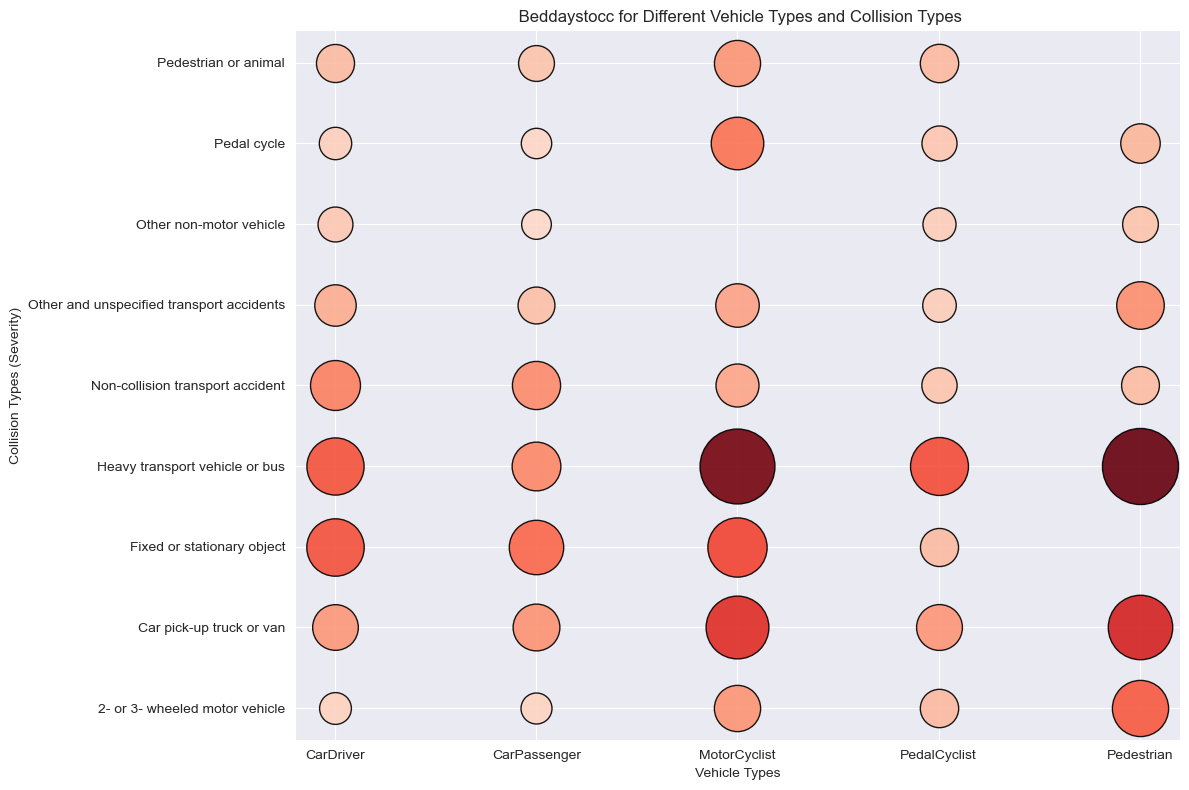

In [22]:
data = {
    "CarDriver": [
        2.2855072463782613, 4.715519605979337, 7.454963727173352, 7.396413710519361, 
        5.638993341685848, 3.881398537473492, 2.755952380954082, 2.372549019607843, 3.275685102143498
    ],
    "CarPassenger": [
        2.1691176470588234, 4.946846488441655, 6.69083740411062, 5.3688394683052145, 
        5.242850925560451, 3.078140830799392, 1.992537313432836, 2.090909090909091, 2.905401662049862
    ],
    "MotorCyclist": [
        4.833244015732047, 8.91538947115406, 7.942463898737647, 12.686810551571943, 
        4.183587192198175, 4.272191443999537, 0, 6.241269841266666, 4.811825764245371
    ],
    "PedalCyclist": [
        3.323809523807143, 4.752847661522586, 3.2782669499859907, 7.5881824713275865, 
        2.814454467843621, 2.5504120211585324, 2.476470588235294, 2.7845592143733335, 3.329281874038306
    ],
    "Pedestrian": [
        7.138644688643956, 9.383837773517874, 0, 13.081643356641026, 
       3.2342366, 5.112737341770569, 2.887254901960785, 3.5207823960977995, 0
    ]
}



index = [
    "2- or 3- wheeled motor vehicle", 
    "Car pick-up truck or van", 
    "Fixed or stationary object", 
    "Heavy transport vehicle or bus", 
    "Non-collision transport accident", 
    "Other and unspecified transport accidents", 
    "Other non-motor vehicle", 
    "Pedal cycle", 
    "Pedestrian or animal" 
    
]


df = pd.DataFrame(data, index=index)


plt.figure(figsize=(12, 8))

max_value = df.values.max()
sizes = (df.values / max_value) * 1000

for i in range(len(index)):
    for j in range(len(data.keys())):
        color = plt.cm.Reds(df.iloc[i][j] / max_value)
        plt.scatter(j, i, s=sizes[i][j]*3, alpha=0.9, c=color, edgecolor='Black')

plt.title(" Beddaystocc for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (Severity)")
plt.xticks(ticks=range(len(data.keys())), labels=data.keys())  
plt.yticks(ticks=range(len(index)), labels=index) 

plt.tight_layout()  
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

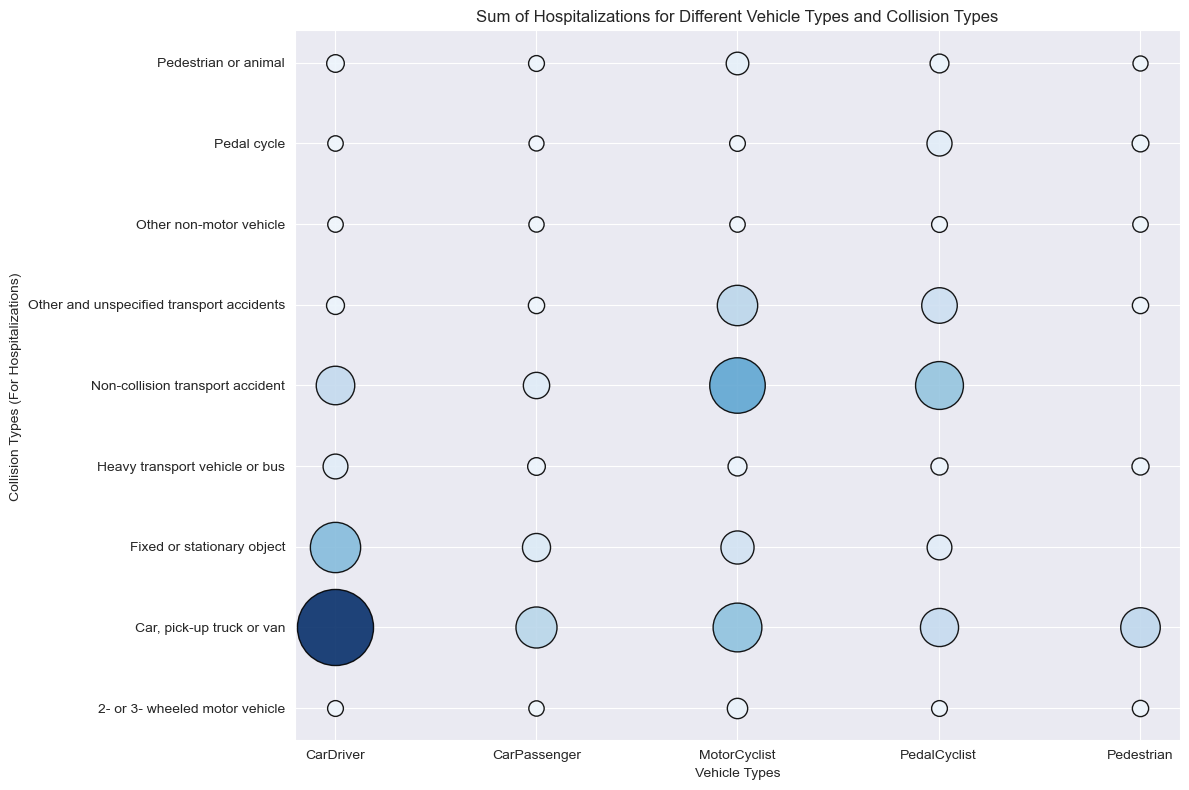

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = {
    "CarDriver": [1.108695652173913, 25.717135732098324, 11.232808022922637, 2.735237173281704, 6.595645412130637, 1.4259597806215722, 1.066326530612245, 1.0588235294117647, 1.3796711509715993],
    "CarPassenger": [1.0441176470588236, 7.4873038516405135, 3.500340367597005, 1.3865030674846626, 3.0768417342262953,  1.174772036474164, 1.0298507462686568, 1.0, 1.113573407202216],
    "MotorCyclist": [1.8392282958199357, 10.569188191881919, 4.872941176470588, 1.5881294964028776, 13.688474705211107,  7.241092086996761, 1.058252427184466, 1.0952380952380953, 2.267361111111111],
    "PedalCyclist": [1.1071428571428572, 6.456278491504351, 2.71581054036024, 1.2974137931034482, 10.182336182336183,  5.612753829711436, 1.1058823529411765, 2.788235294117647, 1.5725806451612903],
    "Pedestrian": [1.1736263736263737, 6.942392909896602, 0, 1.2913752913752914, 0, 1.1772151898734178, 1.0588235294117647, 1.2444987775061125, 1.0073529411764706]
}

index = ["2- or 3- wheeled motor vehicle", "Car, pick-up truck or van", "Fixed or stationary object", "Heavy transport vehicle or bus", 
         "Non-collision transport accident",  "Other and unspecified transport accidents", "Other non-motor vehicle", 
         "Pedal cycle", "Pedestrian or animal"]
df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))

max_value = df.values.max()
sizes = (df.values / max_value) * 1000

for i in range(len(index)):
    for j in range(len(data.keys())):
        color = plt.cm.Blues(df.iloc[i][j] / max_value) 
        plt.scatter(j, i, s=sizes[i][j]*3, alpha=0.9, c=color, edgecolor='black')

plt.title("Sum of Hospitalizations for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For Hospitalizations) ")
plt.xticks(ticks=range(len(data.keys())), labels=data.keys()) 
plt.yticks(ticks=range(len(index)), labels=index)  

plt.tight_layout()  
plt.show()
